In this notebook, we will train a model on the dataset created in the Transforming Meta-Categories notebook. The dataset contains product category labels (X) and a labeled Meta-Category (Y). The purpose of this model is to be able to recognize a product, and tell into which Meta-Category it belongs. We will try two different models: TF-IDF with Naive Bayes and TF-IDF with Logistic Regression. 

In [24]:
import os
import pandas as pd
# Define the path to the directory containing the Excel files
path = os.getcwd()

training_data_file = os.path.join(path + "/Spreadsheets/merged_dataset_with_meta_category.csv")
# Load the training data file
training_data = pd.read_csv(training_data_file)



In [33]:
# Visualize the first few rows of the training data
print("Training Data Sample:")
print(training_data.head())

# drop columns name_y and Meta-Category2
training_data = training_data.drop(columns=['name_y', 'Meta-Category2'], errors='ignore')

print("Shape of the training data after dropping columns:")
print(training_data.shape)

Training Data Sample:
                                              name_x  \
0  AmazonBasics AA Performance Alkaline Batteries...   
1  AmazonBasics AA Performance Alkaline Batteries...   
2  AmazonBasics AA Performance Alkaline Batteries...   
3  AmazonBasics AA Performance Alkaline Batteries...   
4  AmazonBasics AA Performance Alkaline Batteries...   

                                            category primary_category  \
0  AA,AAA,Electronics Features,Health,Electronics...  Health & Beauty   
1  AA,AAA,Electronics Features,Health,Electronics...  Health & Beauty   
2  AA,AAA,Electronics Features,Health,Electronics...  Health & Beauty   
3  AA,AAA,Electronics Features,Health,Electronics...  Health & Beauty   
4  AA,AAA,Electronics Features,Health,Electronics...  Health & Beauty   

  Meta-Category  
0     Batteries  
1     Batteries  
2     Batteries  
3     Batteries  
4     Batteries  
Shape of the training data after dropping columns:
(2886008, 4)


In [26]:
# Preprocess the date via tokenization and lemmatization
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def text_preprocessing_pipeline(text):
    # Step 1: Tokenize the text
    tokens = word_tokenize(text)

    # Step 2: Remove punctuation and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens]  # Keep only letters
    tokens = [word for word in tokens if word]  # Remove empty strings

    # Step 3: Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

# Create a local copy of the training data
training_data_copy = training_data.copy()

# Apply the text preprocessing pipeline function to the 'category' and 'Meta-Category' columns
training_data_copy['category'] = training_data_copy['category'].apply(text_preprocessing_pipeline)
training_data_copy['Meta-Category'] = training_data_copy['Meta-Category'].apply(text_preprocessing_pipeline)


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = training_data_copy['category']
y = training_data_copy['Meta-Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [28]:
# Use TfidfVectorizer to convert text data into a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = TfidfVectorizer.fit_transform(X_train)
X_test_tfidf = TfidfVectorizer.transform(X_test)

In [29]:
# Fit the TF-IDF Vectorized data to a Naive Bayes classifier model and run an accuracy test
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, classification_report
y_pred = nb_classifier.predict(X_test_tfidf)
training_accuracy = nb_classifier.score(X_train_tfidf, y_train)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Training Accuracy: 99.86%
Model Accuracy: 99.86%
Classification Report:
                            precision    recall  f1-score   support

                 Batteries       1.00      1.00      1.00      2384
Connected Home Electronics       0.92      1.00      0.96      2697
           Office Supplies       0.62      0.99      0.77       883
              Pet Products       0.04      1.00      0.07         2
      Portable Electronics       1.00      1.00      1.00    571236

                  accuracy                           1.00    577202
                 macro avg       0.72      1.00      0.76    577202
              weighted avg       1.00      1.00      1.00    577202



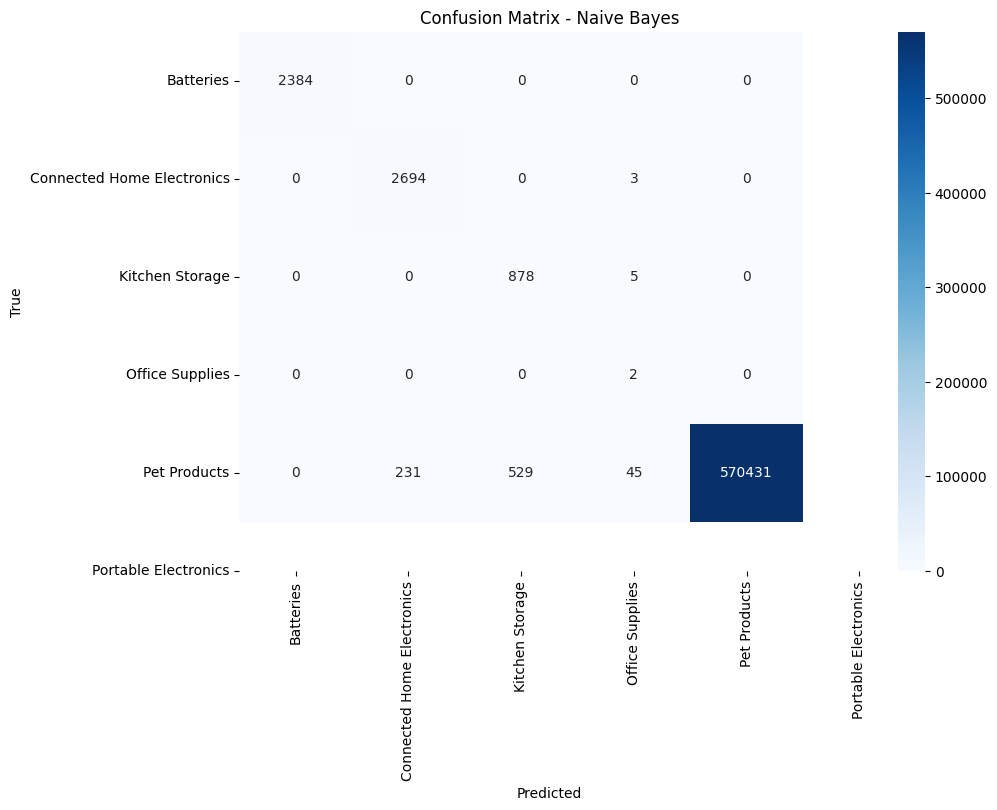

In [30]:
# Visualize the confusion matrix for the Naive Bayes classifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.title("Confusion Matrix - Naive Bayes")
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [31]:
# Fit the TF-IDF vectorized data to a Logistic Regression classifier model and run an accuracy test
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_classifier.fit(X_train_tfidf, y_train)
# Evaluate the model on the test set
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
training_accuracy = logistic_classifier.score(X_train_tfidf, y_train)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Model Accuracy: {accuracy_logistic * 100:.2f}%")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Training Accuracy: 99.96%
Logistic Regression Model Accuracy: 99.95%
Logistic Regression Classification Report:


C:\Users\karel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                            precision    recall  f1-score   support

                 Batteries       1.00      1.00      1.00      2384
Connected Home Electronics       0.95      1.00      0.98      2697
           Office Supplies       1.00      0.86      0.92       883
              Pet Products       0.00      0.00      0.00         2
      Portable Electronics       1.00      1.00      1.00    571236

                  accuracy                           1.00    577202
                 macro avg       0.79      0.77      0.78    577202
              weighted avg       1.00      1.00      1.00    577202



C:\Users\karel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


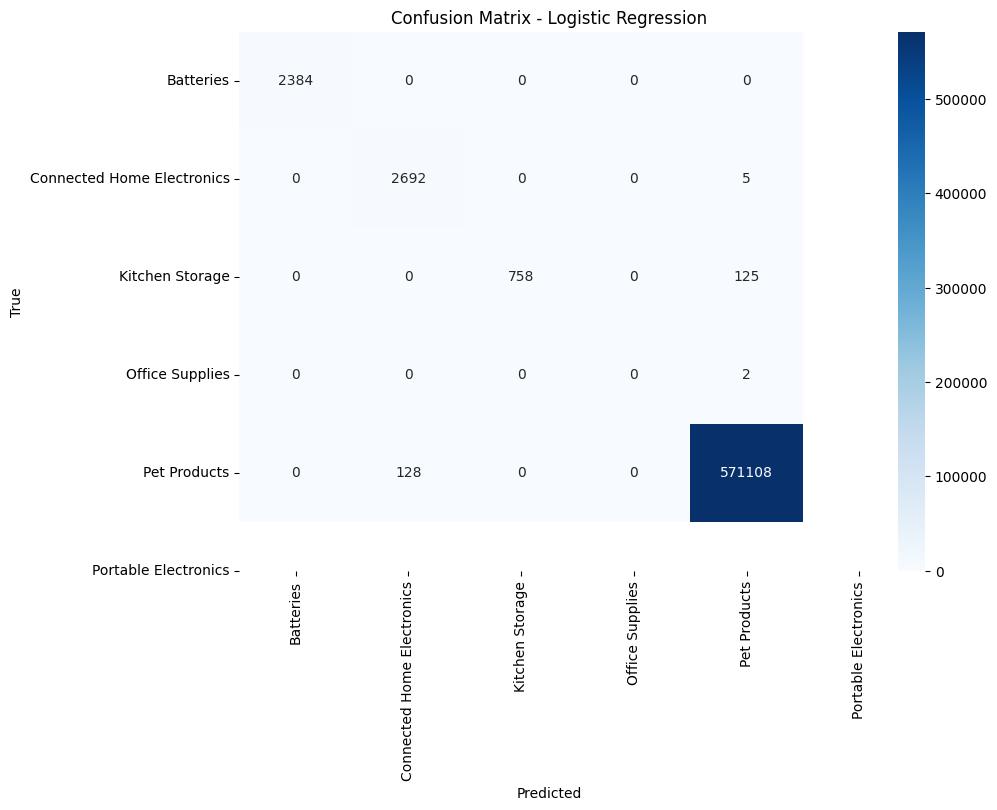

In [32]:
# Visualize the results of the Logistic Regression classifier in a confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(10, 7))
plt.title("Confusion Matrix - Logistic Regression")
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_classifier.classes_, yticklabels=logistic_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


From the accuracy scores and confusion matrixes, we can see that the results provided by both the Naive Bayes and Logistic Regression models are identical. This might have multiple causes, but we suspect this is due to the limited size of the dataset, and the fact that it is heavily skewed towards to meta-categories: Portable Electronics and Connected Home Electronics. The matrix also suggests that the data is not evenly divided over the dataset. In v2 of this notebook, we will try cross-validation to try and resolve this issue. 